In [2]:
#Sources:
#Hands On ML with Scikit-Learn, Keras und Tensorflow, A.Geron, O'Reilly - gemäss Vorlesung
#http://alumni.media.mit.edu/~tpminka/courses/36-350.2001/lectures/day19/
#https://github.com/parth1902/Scrape-FBref-data/blob/master/README.md
#https://statsbomb.com/articles/soccer/statsbomb-release-free-2020-21-fa-womens-super-league-data-updated-r-guide/
#https://github.com/Matheuskempa/My Udacity Capstone
#Code aus Vorlesungswoche 8
#https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#daten aus csv einlesen
df = pd.read_csv('Swiss.csv')
df.head(7)

,Wk,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Sat,2021-07-24,18:00,Luzern,3–4,Young Boys,13200.0,swissporarena,Fedayi San,Match Report,NaN
1,1.0,Sat,2021-07-24,20:30,Lausanne-Sport,1–2,St. Gallen,4632.0,Stade de la Tuilière,Urs Schnyder,Match Report,NaN
2,1.0,Sun,2021-07-25,14:15,Lugano,0–2,Zürich,2120.0,Stadio di Cornaredo,Stefan Horisberger,Match Report,NaN
3,1.0,Sun,2021-07-25,16:30,Grasshopper,0–2,Basel,3400.0,Stadion Letzigrund,Lukas Fähndrich,Match Report,NaN
4,1.0,Sun,2021-07-25,16:30,Sion,1–2,Servette FC,4000.0,Stade de Tourbillon,Luca Piccolo,Match Report,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,Sat,2021-07-31,18:00,Zürich,3–1,Lausanne-Sport,5433.0,Stadion Letzigrund,Luca Cibelli,Match Report,NaN


In [20]:
#Zeilen mit NaN weglassen, unnötige Spalten droppen
df = df[df['Wk'].notna()]
df = df.drop('Notes', 1)
df = df.drop('Match Report', 1)
df.head(7)

,Wk,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee
0,1.0,Sat,2021-07-24,18:00,Luzern,3–4,Young Boys,13200.0,swissporarena,Fedayi San
1,1.0,Sat,2021-07-24,20:30,Lausanne-Sport,1–2,St. Gallen,4632.0,Stade de la Tuilière,Urs Schnyder
2,1.0,Sun,2021-07-25,14:15,Lugano,0–2,Zürich,2120.0,Stadio di Cornaredo,Stefan Horisberger
3,1.0,Sun,2021-07-25,16:30,Grasshopper,0–2,Basel,3400.0,Stadion Letzigrund,Lukas Fähndrich
4,1.0,Sun,2021-07-25,16:30,Sion,1–2,Servette FC,4000.0,Stade de Tourbillon,Luca Piccolo
6,2.0,Sat,2021-07-31,18:00,Zürich,3–1,Lausanne-Sport,5433.0,Stadion Letzigrund,Luca Cibelli
7,2.0,Sat,2021-07-31,20:30,Young Boys,0–0,Grasshopper,20826.0,Wankdorfstadion,Sandro Schärer


In [21]:
#resultat trennen
df["Score"] = df["Score"].replace("\–", "", regex=True)
df.head(6)

# resultat in Heim und Auswärts Spalte trennen
df['HomeScore'] = df['Score'].str[0:1]
df['HomeScore'] = df['HomeScore'].astype(str).astype(float)
df['AwayScore'] = df['Score'].str[1:2].astype(str)
df['AwayScore'] = df['AwayScore'].astype(str).astype(float)
print(df.head(10))

print(df.dtypes)



#Score Teilen
#for score in df:
 #   score = df['Score']
  #  x = [int(a) for a in str(score)]
   # print(x)

     Wk  Day        Date   Time            Home Score            Away  \
0   1.0  Sat  2021-07-24  18:00          Luzern    34      Young Boys   
1   1.0  Sat  2021-07-24  20:30  Lausanne-Sport    12      St. Gallen   
2   1.0  Sun  2021-07-25  14:15          Lugano    02          Zürich   
3   1.0  Sun  2021-07-25  16:30     Grasshopper    02           Basel   
4   1.0  Sun  2021-07-25  16:30            Sion    12     Servette FC   
6   2.0  Sat  2021-07-31  18:00          Zürich    31  Lausanne-Sport   
7   2.0  Sat  2021-07-31  20:30      Young Boys    00     Grasshopper   
8   2.0  Sun  2021-08-01  14:15      St. Gallen    22          Luzern   
9   2.0  Sun  2021-08-01  16:30           Basel    61            Sion   
10  2.0  Sun  2021-08-01  16:30     Servette FC    02          Lugano   

    Attendance                 Venue             Referee  HomeScore  AwayScore  
0      13200.0         swissporarena          Fedayi San        3.0        4.0  
1       4632.0  Stade de la Tuiliè

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 216
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wk          180 non-null    float64
 1   Day         180 non-null    object 
 2   Date        180 non-null    object 
 3   Time        180 non-null    object 
 4   Home        180 non-null    object 
 5   Score       150 non-null    object 
 6   Away        180 non-null    object 
 7   Attendance  144 non-null    float64
 8   Venue       180 non-null    object 
 9   Referee     150 non-null    object 
 10  HomeScore   150 non-null    float64
 11  AwayScore   150 non-null    float64
dtypes: float64(4), object(8)
memory usage: 18.3+ KB


In [23]:
#Neue Spalte mit Niederlage(0)/Sieg(1)/Unentschieden(2)
import numpy as np
df['Ergebnis'] = "2"
df['Ergebnis'] = df['Ergebnis'].astype(str).astype(float)
#df.info()

#for Schleife unm die spalte "Ergebnis" zu befüllen
for index, row in df.iterrows():
    home = row['HomeScore']
    away = row['AwayScore']
    if home < away:
        #print("home lose: ")
        #print(index)
        df["Ergebnis"][index]  = 0 #df.append({'Ergebnis': 0}, ignore_index=True) 
    elif home > away:
        #print("home win: ")
        #print(index)
        df["Ergebnis"][index] = 1
    elif ((home-away) == 0):
        #print("draw: ")
        #print(index)
        df["Ergebnis"][index]  = 2


#print(df["Ergebnis"])
df.head(10)
        

,Wk,Day,Date,Time,Home,Score,Away,Attendance,Venue,Referee,HomeScore,AwayScore,Ergebnis
0,1.0,Sat,2021-07-24,18:00,Luzern,34,Young Boys,13200.0,swissporarena,Fedayi San,3.0,4.0,0.0
1,1.0,Sat,2021-07-24,20:30,Lausanne-Sport,12,St. Gallen,4632.0,Stade de la Tuilière,Urs Schnyder,1.0,2.0,0.0
2,1.0,Sun,2021-07-25,14:15,Lugano,02,Zürich,2120.0,Stadio di Cornaredo,Stefan Horisberger,0.0,2.0,0.0
3,1.0,Sun,2021-07-25,16:30,Grasshopper,02,Basel,3400.0,Stadion Letzigrund,Lukas Fähndrich,0.0,2.0,0.0
4,1.0,Sun,2021-07-25,16:30,Sion,12,Servette FC,4000.0,Stade de Tourbillon,Luca Piccolo,1.0,2.0,0.0
6,2.0,Sat,2021-07-31,18:00,Zürich,31,Lausanne-Sport,5433.0,Stadion Letzigrund,Luca Cibelli,3.0,1.0,1.0
7,2.0,Sat,2021-07-31,20:30,Young Boys,00,Grasshopper,20826.0,Wankdorfstadion,Sandro Schärer,0.0,0.0,2.0
8,2.0,Sun,2021-08-01,14:15,St. Gallen,22,Luzern,12548.0,Kybunpark,Adrien Jaccottet,2.0,2.0,2.0
9,2.0,Sun,2021-08-01,16:30,Basel,61,Sion,15112.0,St. Jakob-Park,Urs Schnyder,6.0,1.0,1.0
10,2.0,Sun,2021-08-01,16:30,Servette FC,02,Lugano,3225.0,Stade de Genève,Alain Bieri,0.0,2.0,0.0


In [24]:
#ungültige werte droppen
df.dropna(inplace=True)
df.isna().sum()

Wk            0
Day           0
Date          0
Time          0
Home          0
Score         0
Away          0
Attendance    0
Venue         0
Referee       0
HomeScore     0
AwayScore     0
Ergebnis      0
dtype: int64

In [38]:
#Man könnte die Daten jetzt "anreichern" mit Daten von einer API (in diesem Fall Wettquoten)
#Wir haben hier Daten von https://rapidapi.com/boggio-analytics/api/football-prediction/details geholt
#Diese müssten jetzt aber gecleansed und bearbeitet werden und dann richtig eingefügt (würde den Rahmen des Projeks sprengen)
#Es geht eher darum zu zeigen wie wir eine API nutzen könnten -> Folgend verwenden wir aber die Daten nicht
#(Achtung API ist Freemium) 

import requests

url = "https://football-prediction-api.p.rapidapi.com/api/v2/predictions"

query= {"market":"classic","iso_date":"2018-12-01","federation":"UEFA"}

headers = {
	"X-RapidAPI-Host": "football-prediction-api.p.rapidapi.com",
	"X-RapidAPI-Key": "b912b06b60msh453b9c0caa921d1p14120djsnf22ee092a9f7"
}

response = requests.request("GET", url, headers=headers, params=query)

print(response.text)

{"data": [{"home_team": "Pomorie", "away_team": "Strumska Slava Radomir", "id": 40586, "market": "classic", "competition_name": "Second PFL", "prediction": "1X", "competition_cluster": "Bulgaria", "status": "lost", "federation": "UEFA", "is_expired": true, "season": "2018 - 2019", "result": "0 - 2", "start_date": "2018-12-01T12:30:00", "last_update_at": "2018-12-01T12:15:21.956000", "odds": {"1": 1.975, "X": 3.11, "2": 3.18, "1X": 1.26, "X2": 1.625, "12": 1.27}}, {"home_team": "FC Koln", "away_team": "Greuther Furth", "id": 40101, "market": "classic", "competition_name": "2. Bundesliga", "prediction": "1", "competition_cluster": "Germany", "status": "won", "federation": "UEFA", "is_expired": true, "season": "2018 - 2019", "result": "4 - 0", "start_date": "2018-12-01T12:00:00", "last_update_at": "2018-12-01T09:16:17.282000", "odds": {"1": 1.367, "X": 4.834, "2": 7.38, "1X": 1.081, "X2": 2.951, "12": 1.146}}, {"home_team": "Sankt Pauli", "away_team": "Dynamo Dresden", "id": 40103, "marke

In [65]:
#imports
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

#Scikit algorithmen (einfach einmal alle)
clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

#variablen welche nicht relevant sind droppen
eingabe = df.drop(columns=['Wk','Score', 'Day', 'Date', 'Time','Home','Away','Referee','Venue','Ergebnis'])
eingabe.info()


x = pd.DataFrame(eingabe)
y = df["Ergebnis"]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)



random_forest_list = []
regression_list = []
svm_list = []
knn_list = []


for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    
    clf_random.fit(X_train,y_train)
    clf_logistic.fit(X_train,y_train)
    clf_svm.fit(X_train,y_train)
    clf_KNN.fit(X_train,y_train)
    
    
    rdf = clf_random.predict(X_test)
    acc_random = accuracy_score(y_test,rdf)
    random_forest_list.append(acc_random)

    log = clf_logistic.predict(X_test)
    acc_log = accuracy_score(y_test,log)
    regression_list.append(acc_log)
    
    svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test,svm)
    svm_list.append(acc_svm)
    
    knn = clf_KNN.predict(X_test)
    acc_knn = accuracy_score(y_test,knn)
    knn_list.append(acc_knn)

    

print("Random Forest Accuracy:", np.array(random_forest_list).mean(),np.array(random_forest_list).std())

print("Logistic Regression Accuracy:", np.array(regression_list).mean(),np.array(regression_list).std())

print("SVM Accuracy:", np.array(svm_list).mean(),np.array(svm_list).std())

print("KNN Accuracy:", np.array(knn_list).mean(),np.array(knn_list).std())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 180
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Attendance  144 non-null    float64
 1   HomeScore   144 non-null    float64
 2   AwayScore   144 non-null    float64
dtypes: float64(3)
memory usage: 4.5 KB
Random Forest Accuracy: 0.9431818181818181 0.032540502416537186
Logistic Regression Accuracy: 0.9704545454545455 0.020454545454545458
SVM Accuracy: 0.34090909090909094 0.07041787902195304
KNN Accuracy: 0.3818181818181818 0.07793830999764657


<AxesSubplot:xlabel='Wichtigkeit', ylabel='Feature'>

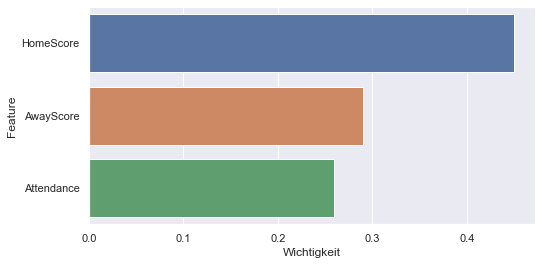

In [71]:
#Verteilung der Importance der einzelnen Features im Random Forest ausgeben

importance = clf_random.feature_importances_

list_1 = []
list_2 = []
for i,j in zip(importance,eingabe.columns):
    list_1.append(str(j))
    list_2.append(i)
    
df_name = pd.DataFrame(list_1,columns=["Feature"])
df_number = pd.DataFrame(list_2,columns=["Wichtigkeit"])

df_ranking = pd.concat([df_name, df_number], axis=1)
df_final = df_ranking.sort_values("Wichtigkeit",ascending=False).reset_index(drop=True)
df_final.Column = df_final.Feature.astype(str)
f, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x="Wichtigkeit", y="Feature", data=df_final)